# Get and examine data

## Download data

In [11]:
# Necessary data science packages
import sys
from packaging import version
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

wine_dataset = sklearn.datasets.load_wine()
wine_df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
wine_df['labels'] = wine_dataset['target'] # Also add the labels associated with each sample

# Added code - maybe take out. 
X, y = wine_dataset.data, wine_dataset.target
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
X.shape

(178, 13)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
y.shape

(178,)

## Inspect the data

In [2]:
# Display the head of the wine dataframe. 
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Display column names and types
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [4]:
# Get the value counts for each different type of wine. 
wine_df['labels'].value_counts()

1    71
0    59
2    48
Name: labels, dtype: int64

It seems that the labels are roughly balanced, although wine type #1 is the most common. Now, let's do a train-test split. 

In [5]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = shuffle_and_split_data(wine_df, 0.2)
len(train_set)

143

In [8]:
# Allows results of the notebook to be reproducible. 
np.random.seed(42)

In [7]:
len(test_set)

35

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(59,)

## Training and Predictions

We have successfully performed a train-test split with 143 samples in the training set and 35 samples in the test set.
Since we are dealing with a small dataset for multi-class classification, it might be helpful to use the SVM classifier. 

In [41]:
from sklearn.svm import SVC

# Instantiate and fit on the training set. 
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [42]:
# Predict on the testing set. 
predictions = svm_clf.predict(X_test)

In [43]:
# Now, let's evaluate the accuracy of the predictions. 
from sklearn.metrics import accuracy_score as accuracy
round(accuracy(y_test, predictions), 2)

0.71

We get an accuracy of around 71%. Let's plot our results in a confusion matrix. 

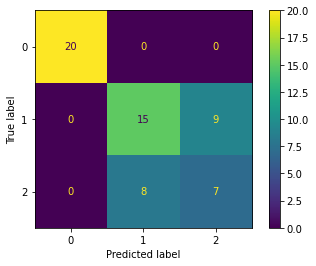

In [61]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = metrics.confusion_matrix(y_test, predictions)
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2])
cm.plot()